In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append("../")

from datasets import txtDataCreator
from midiToTxt import converter,compressor
import matplotlib.pyplot as plt

In [4]:
data_folder = "../scraper/genresDataset"
genres = ["blues", "country", "jazz", "pop", "rock"]
methods = [1, 2]
destination_folder = "../entropy_data"

In [1]:
with_drums=False
resolution = 8
for method in methods:
    destination_sub_folder = os.path.join(destination_folder, f"method_{method}")
    if not os.path.isdir(destination_sub_folder):
        os.mkdir(destination_sub_folder)
        
    for genre in genres:
        source_path = os.path.join(data_folder, genre)
        destination_path = os.path.join(destination_sub_folder, f"{genre}_res={resolution}_withdrums={with_drums}_method{method}.txt")

        creator = txtDataCreator.Creator(source_path,
                      merged_file_name=destination_path)
        creator.prepare_data(".", compression_type="lossy", songs_separator="\n", with_drums=with_drums, method=method, resolution=resolution)

In [12]:
with_drums=False
resolution = 8
methods = [1]
data_folder ="../scraper/genresDataset/blues"
artists = ["ericclapton", "stevierayvaughan", "bbking", "jimihendrix"]
for method in methods:
    destination_sub_folder = os.path.join(destination_folder, f"method_{method}_artists")
    if not os.path.isdir(destination_sub_folder):
        os.mkdir(destination_sub_folder)
        
    for artist in artists:
        source_path = os.path.join(data_folder, artist)
        print(source_path)
        destination_path = os.path.join(destination_sub_folder, f"method{method}_{artist}_res={resolution}_withdrums={with_drums}_method{method}.txt")

        creator = txtDataCreator.Creator(source_path,
                      merged_file_name=destination_path)
        creator.prepare_data(".", compression_type="lossy", songs_separator="\n", with_drums=with_drums, method=method, resolution=resolution)

../scraper/genresDataset/blues\ericclapton
../scraper/genresDataset/blues\stevierayvaughan
../scraper/genresDataset/blues\bbking
../scraper/genresDataset/blues\jimihendrix
Invalid MIDI file at ../scraper/genresDataset/blues\jimihendrix\WildThing.mid: Could not decode key with 1 flats and mode 39.


In [ ]:
with_drums=False
resolution = 8
methods = [1]
data_folder ="../scraper/genresDataset/blues/ericclapton"
songs = ["cocaine.mid", "crossroads.mid", ""]
c = converter.MidiTxtConverter()
for method in methods:
    destination_sub_folder = os.path.join(destination_folder, f"method_{method}_claptonsongs")
    if not os.path.isdir(destination_sub_folder):
        os.mkdir(destination_sub_folder)
        
    for song in songs:
        source_path = os.path.join(data_folder, song)
        print(source_path)
        destination_path = os.path.join(destination_sub_folder, f"method{method}_{song.split('.')[0]}_res={resolution}_withdrums={with_drums}_method{method}.txt")
        c.midi_to_txt(source_path, destination_path, destination_path, split_sections=False, with_drums=with_drums)

In [11]:
import math
import numpy as np
X = np.arange(0.00001, 1.00001, 0.00001)
y = [-math.log(x,2) for x in X]

4.0
1.6780719051126378
0.6780719051126377


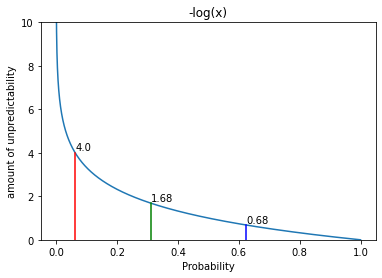

In [38]:
plt.plot(X,y)
ax = plt.gca()
ax.set_ylim([0, 10])
ax.set_title("-log(x)")
ax.set_xlabel("Probability")
ax.set_ylabel("amount of unpredictability")
offset = 0.1
for x,c in zip([1/16, 5/16, 10/16], ['r', 'g', 'b']):
    print(-math.log(x,2))
    plt.axvline(x = x, ymax= -math.log(x,2)/10, color = c)
    plt.text(x, -math.log(x,2) + offset, str(round(-math.log(x,2),2)))
#plt.show()
plt.savefig("neg_logarithm", dpi=800)

In [44]:
entropy = 0
for x in [10/16, 5/16, 1/16]:
    entropy += round(x,2)*-round(math.log(x,2),2)
    print(f"{round(x,2)}*{-round(math.log(x,2),2)} + ", end="")
print(entropy)

0.62*0.68 + 0.31*1.68 + 0.06*4.0 + 1.1824


4.0
1.6780719051126378
0.6780719051126377


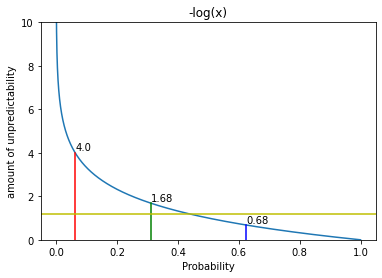

In [50]:
plt.plot(X,y)
ax = plt.gca()
ax.set_ylim([0, 10])
ax.set_title("-log(x)")
ax.set_xlabel("Probability")
ax.set_ylabel("amount of unpredictability")
offset = 0.1
for x,c in zip([1/16, 5/16, 10/16], ['r', 'g', 'b']):
    print(-math.log(x,2))
    plt.axvline(x = x, ymax= -math.log(x,2)/10, color = c)
    plt.text(x, -math.log(x,2) + offset, str(round(-math.log(x,2),2)))
#plt.show()
plt.axhline(y=entropy, color='y', linestyle = '-')
plt.savefig("entropy_neg_logarithm", dpi=800)